In [1]:
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.operators.sampling.lhs import LatinHypercubeSampling
from pymoo.optimize import minimize as moo_minimize
from pymoo.algorithms.moo.nsga3 import ReferenceDirectionSurvival
from pymoode.nsder import NSDER
from pymoode.gde3 import GDE3
from pymoode.survivors import RankSurvival
from pymoo.factory import get_reference_directions

In [2]:
from pymoo.factory import get_problem
from pymoo.util.plotting import plot

problem = get_problem("dtlz2")

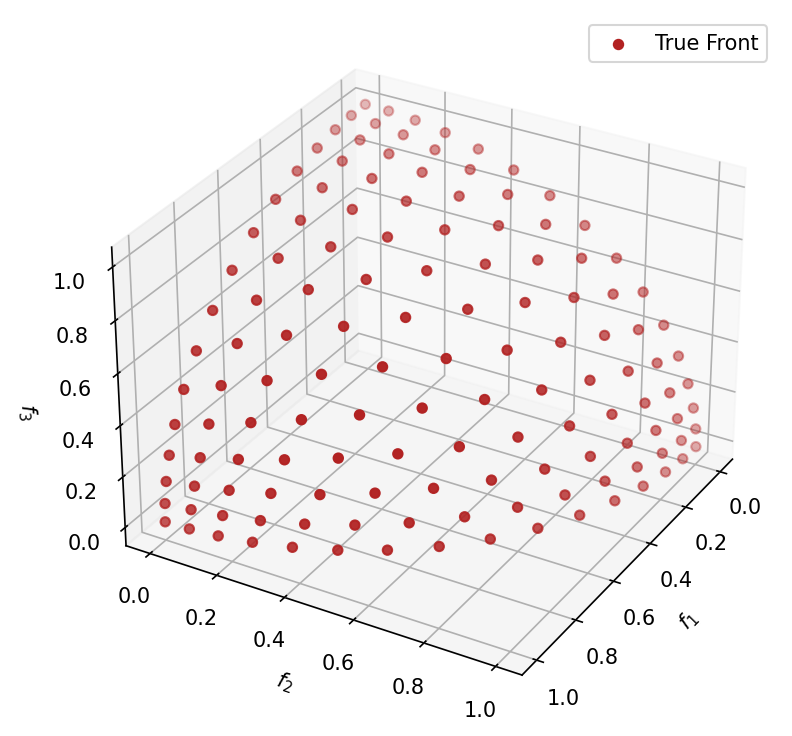

In [3]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})
ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [4]:
lhs = LatinHypercubeSampling()

In [5]:
NGEN = 250
POPSIZE = 136
SEED = 3

In [6]:
problem.__dict__

{'k': 8,
 'n_var': 10,
 'n_obj': 3,
 'n_constr': 0,
 'data': {'type_var': numpy.float64},
 'xl': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'xu': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'callback': None,
 'check_inconsistencies': True,
 'replace_nan_values_by': inf,
 'exclude_from_serialization': [],
 '_pareto_set': <pymoo.util.cache.Cache at 0x173dc1f4940>,
 '_pareto_front': <pymoo.util.cache.Cache at 0x173dc1f4730>,
 '_ideal_point': None,
 '_nadir_point': None}

In [7]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=15)

In [8]:
ref_dirs.shape

(136, 3)

In [9]:
gde3 = GDE3(pop_size=POPSIZE, CR=0.2, F=(0.0, 1.0), sampling=lhs, gamma=1e-4, refpoint=1,
            variant="DE/rand/1/bin", SA=0.5,
            survival=RankSurvival(rule="full", crowding_func="mnn")
            )

res_gde3 = moo_minimize(problem,
                        gde3,
                        ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     136 |  0.409543711 |  0.501275985
    2 |     272 |  0.367972730 |  0.485447893
    3 |     408 |  0.336208116 |  0.430072425
    4 |     544 |  0.315498481 |  0.427838211
    5 |     680 |  0.291500587 |  0.367462242
    6 |     816 |  0.245706738 |  0.340672209
    7 |     952 |  0.224308983 |  0.318956297
    8 |    1088 |  0.200404169 |  0.273394693
    9 |    1224 |  0.174877819 |  0.226951302
   10 |    1360 |  0.159229266 |  0.207332129
   11 |    1496 |  0.149202334 |  0.203852320
   12 |    1632 |  0.139331141 |  0.176650760
   13 |    1768 |  0.128502033 |  0.151238741
   14 |    1904 |  0.116475917 |  0.134806072
   15 |    2040 |  0.108720221 |  0.115117553
   16 |    2176 |  0.101015940 |  0.106613798
   17 |    2312 |  0.092527153 |  0.099337704
   18 |    2448 |  0.084862254 |  0.088221574
   19 |    2584 |  0.080937783 |  0.081054379
   20 |    2720 |  0.073175675 |  0.076225759
   21 |    2856 |  0.071231486 |  

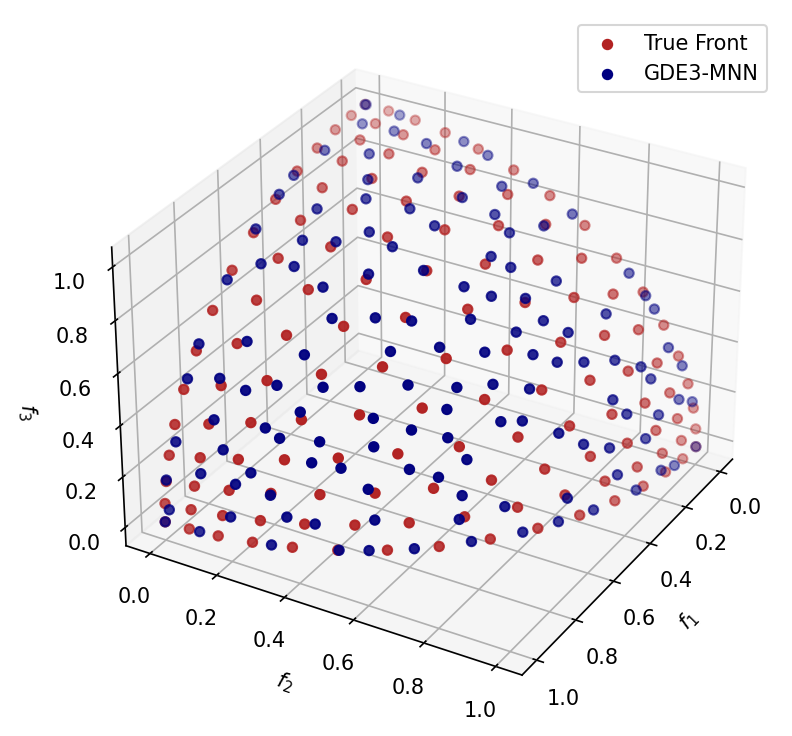

In [10]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_gde3.F[:, 0], res_gde3.F[:, 1], res_gde3.F[:, 2],
        color="navy", label="GDE3-MNN", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [11]:
nsga3 = NSGA3(pop_size=POPSIZE, sampling=lhs,
              ref_dirs=ref_dirs)

res_nsga3 = moo_minimize(problem,
                         nsga3,
                         ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     136 |  0.409543711 |  0.488790248
    2 |     272 |  0.379635563 |  0.471769797
    3 |     408 |  0.344446344 |  0.462725109
    4 |     544 |  0.311356774 |  0.379455101
    5 |     680 |  0.276861595 |  0.341810021
    6 |     816 |  0.242685082 |  0.288821435
    7 |     952 |  0.206166293 |  0.253956090
    8 |    1088 |  0.171647235 |  0.190395125
    9 |    1224 |  0.163088720 |  0.176998052
   10 |    1360 |  0.140361247 |  0.142812235
   11 |    1496 |  0.123655499 |  0.125153020
   12 |    1632 |  0.116637818 |  0.115771849
   13 |    1768 |  0.102922260 |  0.099178463
   14 |    1904 |  0.095706817 |  0.085479036
   15 |    2040 |  0.089658263 |  0.079800626
   16 |    2176 |  0.085228229 |  0.074333031
   17 |    2312 |  0.077633353 |  0.066933718
   18 |    2448 |  0.075609942 |  0.061667907
   19 |    2584 |  0.072389779 |  0.058579648
   20 |    2720 |  0.070784669 |  0.059067275
   21 |    2856 |  0.066376079 |  

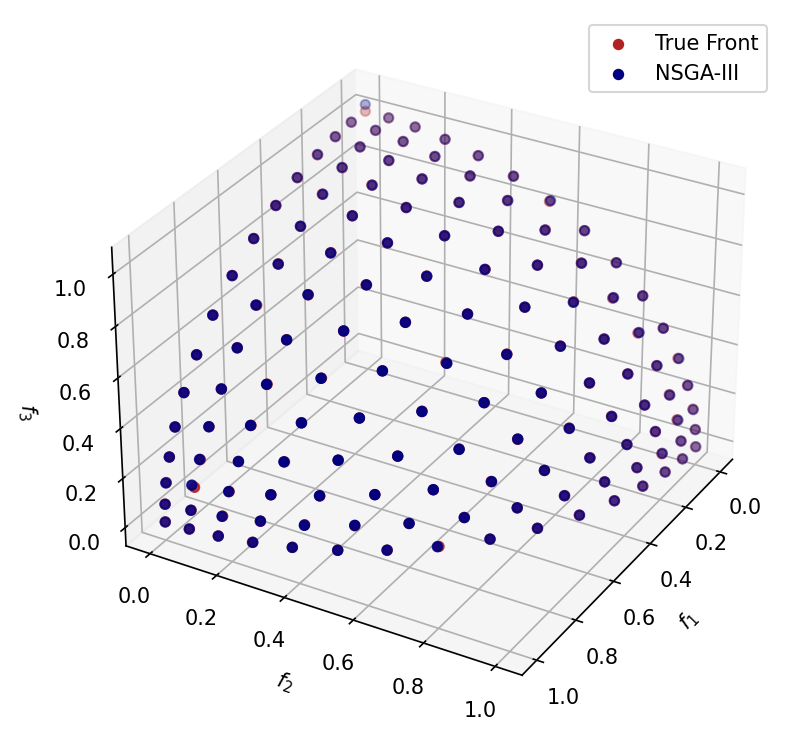

In [12]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_nsga3.F[:, 0], res_nsga3.F[:, 1], res_nsga3.F[:, 2],
        color="navy", label="NSGA-III", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [13]:
nsder = NSDER(ref_dirs=ref_dirs, pop_size=POPSIZE, CR=0.5, F=(0.0, 1.0), sampling=lhs, gamma=1e-4, refpoint=1.0,
             variant="DE/rand/1/bin", SA=0.5)
    
res_nsder = moo_minimize(problem,
                         nsder,
                         ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     136 |  0.409543711 |  0.488790248
    2 |     272 |  0.367274105 |  0.487579835
    3 |     408 |  0.365392633 |  0.478196518
    4 |     544 |  0.327639143 |  0.434236857
    5 |     680 |  0.304503961 |  0.392206806
    6 |     816 |  0.289622303 |  0.370538801
    7 |     952 |  0.243072092 |  0.280845473
    8 |    1088 |  0.219691612 |  0.244467493
    9 |    1224 |  0.183456962 |  0.213111478
   10 |    1360 |  0.172634108 |  0.205012094
   11 |    1496 |  0.157499996 |  0.180538595
   12 |    1632 |  0.139406855 |  0.168447450
   13 |    1768 |  0.128712363 |  0.160433204
   14 |    1904 |  0.118187841 |  0.130169035
   15 |    2040 |  0.107632731 |  0.112693908
   16 |    2176 |  0.103061436 |  0.105115305
   17 |    2312 |  0.095935155 |  0.091548054
   18 |    2448 |  0.084430621 |  0.081321388
   19 |    2584 |  0.076588718 |  0.077191900
   20 |    2720 |  0.072644632 |  0.068284557
   21 |    2856 |  0.067238251 |  

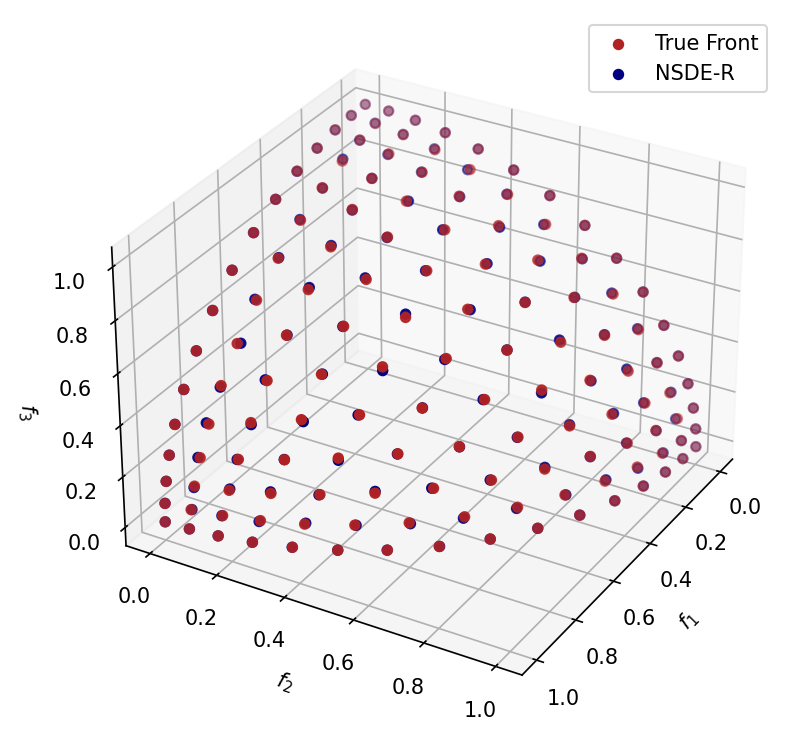

In [14]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_nsder.F[:, 0], res_nsder.F[:, 1], res_nsder.F[:, 2],
        color="navy", label="NSDE-R", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()